In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')

#from simpleplot import *
#from radmc3dPy import image
#from gizmopy.load_from_snapshot import load_from_snapshot
#from gizmopy.load_fire_snap import load_fire_snap
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'


params = {"text.color" : 'w',
          "ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
'''
params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}

'''
plt.rcParams.update(params)

'''
for generalization, see "#change" throughout code on lines where needs change depending on emission line instance (ctrl+f tofind and change quickly), most changes should be covered by changing the parent variable below.
'''
parent = '/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum155/CII_158mu/' #change 

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10


"\nplt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )\n#plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)\nbartxt = r'%d kpc' % np.round(bar_size).astype(int)\nplt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},\n        horizontalalignment='center', verticalalignment='bottom' )\nplt.tight_layout()\nplt.show()\n"

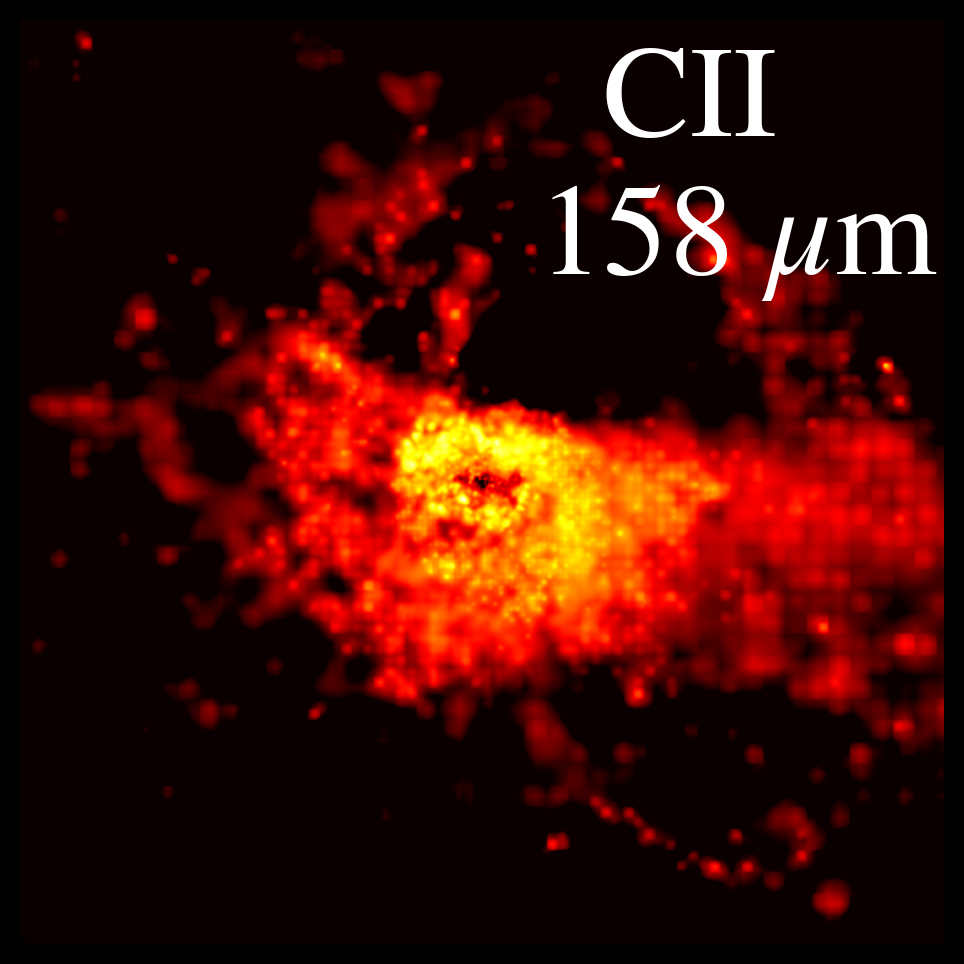

In [8]:
''' CREATING MOMENT 0 '''

filepath_tot = parent + 'image_tot.hdf5'
filepath_con = parent + 'image_continuum.hdf5'
'''
file = h5.File(filepath_tot,'r')
#file = h5.File('/mnt/home/nroy/radmc3d-2.0/run/subtract_comvel/A4_33000_snum152/image_tot.hdf5','r')
#npix_x = int(file['pix_size_x'][()])
#npix_y = int(file['pix_size_y'][()])
npix_x = np.shape(file['image_array'][:])[0]
npix_y = np.shape(file['image_array'][:])[1]

image_array = file['image_array'][:]
frequency_array = 3e8 / (file['lambda_array'][:] * 1e-6)
'''

file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')

#file = h5.File('/mnt/home/nroy/radmc3d-2.0/run/subtract_comvel/A4_33000_snum152/image_tot.hdf5','r')
#npix_x = int(file['pix_size_x'][()])
#npix_y = int(file['pix_size_y'][()])
npix_x = np.shape(file_tot['image_array'][:])[0]
npix_y = np.shape(file_tot['image_array'][:])[1]

image_array = file_tot['image_array'][:] - file_con['image_array'][:]

image_array[image_array < 0] = 0

frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)


integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

integrated_image_array_moment0[0,0] = 0
        
params = {"text.color" : 'w',
          "ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

figx, figy = 8,6

plt.figure(figsize=(figx,figy), dpi=200, facecolor='k')
cmap = matplotlib.cm.hot.copy()
low = cmap(0)
cmap.set_bad(color = low)

#plt.imshow(integrated_image_array.T/np.max(integrated_image_array.T), extent=(-10,10,-10,10), interpolation='bicubic', cmap='hot', vmax=0.2, origin='lower')
plt.imshow(np.log10(integrated_image_array_moment0.T/np.max(integrated_image_array_moment0.T)), extent=(-2,2,-2,2), \
           interpolation='bicubic', cmap='hot', vmin=-1.8, origin='lower')
plt.xlabel('X (kpc)', fontsize = 14)
plt.ylabel('Y (kpc)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.colorbar(label=r'$I_{\nu}$ / max($I_{\nu}$)')

plt.text(0.1,0.9,r'   CII'
               '\n'
               r' 158 $\mu$m', fontsize = 47) #change
cb = plt.colorbar() 
cb.remove()
#plt.title(r'Vel-Integrated NII line emission image of A4 at -50 Myr'
#          '\n [-1000,1000] '
#         r'kms$^{-1}$', fontsize=12)
#plt.title(r'Velocity-Integrated CII image of MW-like galaxy (Face-on)'
#          '\n [-500,500] '
#          r'kms$^{-1}$ ', fontsize=12, usetex = True)

plt.axis('off')
dx = 1
yrg = [ -dx, dx ]
bar_size = 1 #dx / 2.
xleft = -1 #-bar_size/2.
#xleft += 0.5*dx
#ybar = yrg[0] + 0.06*dx
ybar= -1.5
colbar = 'white'
'''
plt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )
#plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)
bartxt = r'%d kpc' % np.round(bar_size).astype(int)
plt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},
        horizontalalignment='center', verticalalignment='bottom' )
plt.tight_layout()
plt.show()
'''


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  


"\nplt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )\n#plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)\nbartxt = r'%d kpc' % np.round(bar_size).astype(int)\nplt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},\n        horizontalalignment='center', verticalalignment='bottom' )\nplt.tight_layout()\nplt.show()\n"

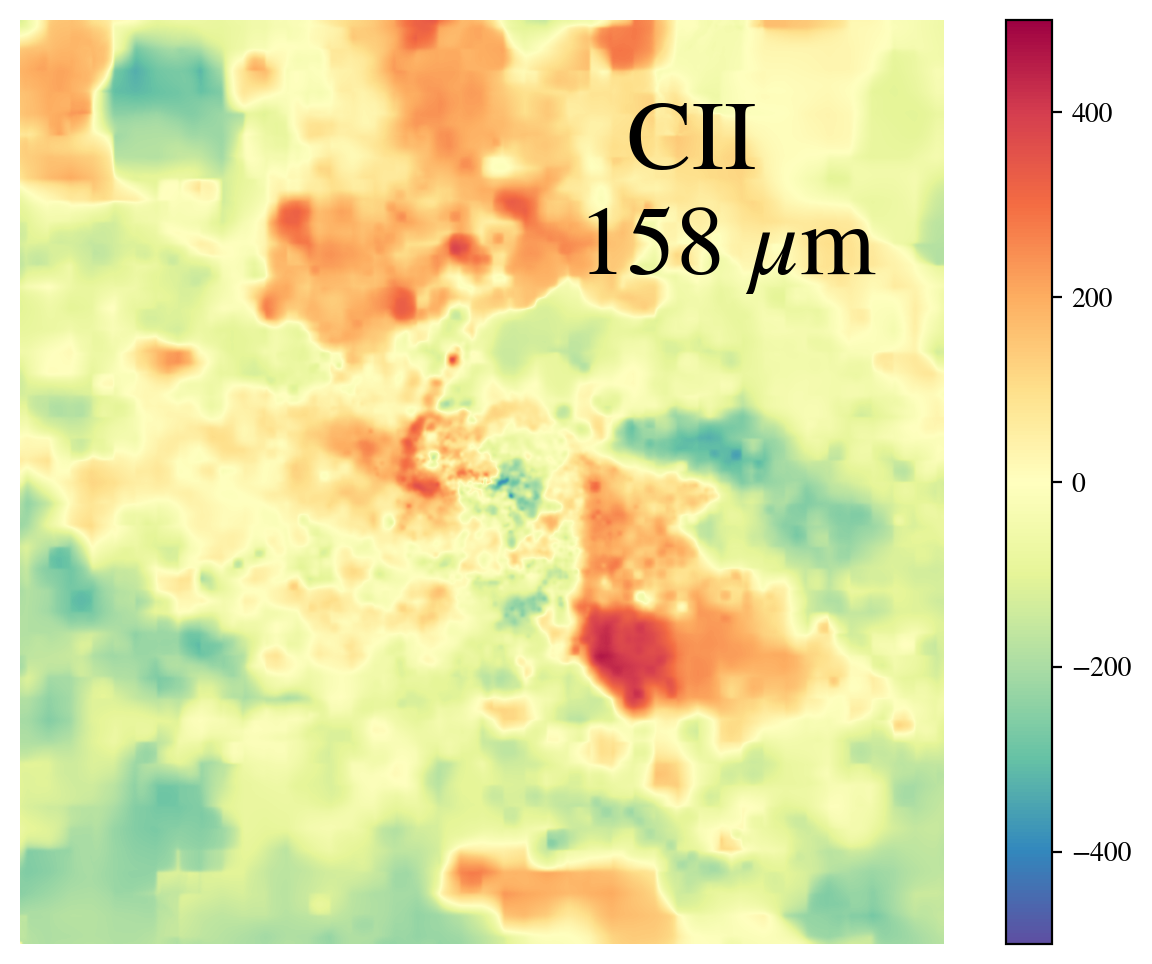

In [9]:
''' CREATING MOMENT 1 '''

N = np.size(frequency_array)
velocity_arr = np.linspace(-1000, 1000, N)

moment1_noint = velocity_arr * image_array

integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment1[0,0] = 0
        
isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
isolate_moment_1[0,0] = 0
        
params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

figx, figy = 8,6

plt.figure(figsize=(figx,figy), dpi=200, facecolor='w')
#integrated_image_array[0,0] = 0
cmap = matplotlib.cm.hot.copy()
low = cmap(0)
cmap.set_bad(color = low)

#plt.imshow(integrated_image_array.T/np.max(integrated_image_array.T), extent=(-10,10,-10,10), interpolation='bicubic', cmap='hot', vmax=0.2, origin='lower')
plt.imshow(isolate_moment_1.T, vmin = -500, vmax = 500, extent=(-2,2,-2,2), \
           interpolation='bicubic', cmap='Spectral_r', origin='lower')
plt.xlabel('X (kpc)', fontsize = 14)
plt.ylabel('Y (kpc)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.colorbar(label=r'$I_{\nu}$ / max($I_{\nu}$)')

plt.text(0.1,0.9,r'     CII'
               '\n'
               r'   158 $\mu$m', fontsize = 35) #change
cb = plt.colorbar() 
cb.remove()
#plt.title(r'Vel-Integrated NII line emission image of A4 at -50 Myr'
#          '\n [-1000,1000] '
#         r'kms$^{-1}$', fontsize=12)
#plt.title(r'Velocity-Integrated CII image of MW-like galaxy (Face-on)'
#          '\n [-500,500] '
#          r'kms$^{-1}$ ', fontsize=12, usetex = True)

plt.axis('off')
dx = 1
yrg = [ -dx, dx ]
bar_size = 1 #dx / 2.
xleft = -1 #-bar_size/2.
#xleft += 0.5*dx
#ybar = yrg[0] + 0.06*dx
ybar= -1.5
colbar = 'white'
'''
plt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )
#plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)
bartxt = r'%d kpc' % np.round(bar_size).astype(int)
plt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},
        horizontalalignment='center', verticalalignment='bottom' )
plt.tight_layout()
plt.show()
'''

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


"\nplt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )\n#plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)\nbartxt = r'%d kpc' % np.round(bar_size).astype(int)\nplt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},\n        horizontalalignment='center', verticalalignment='bottom' )\nplt.tight_layout()\nplt.show()\n"

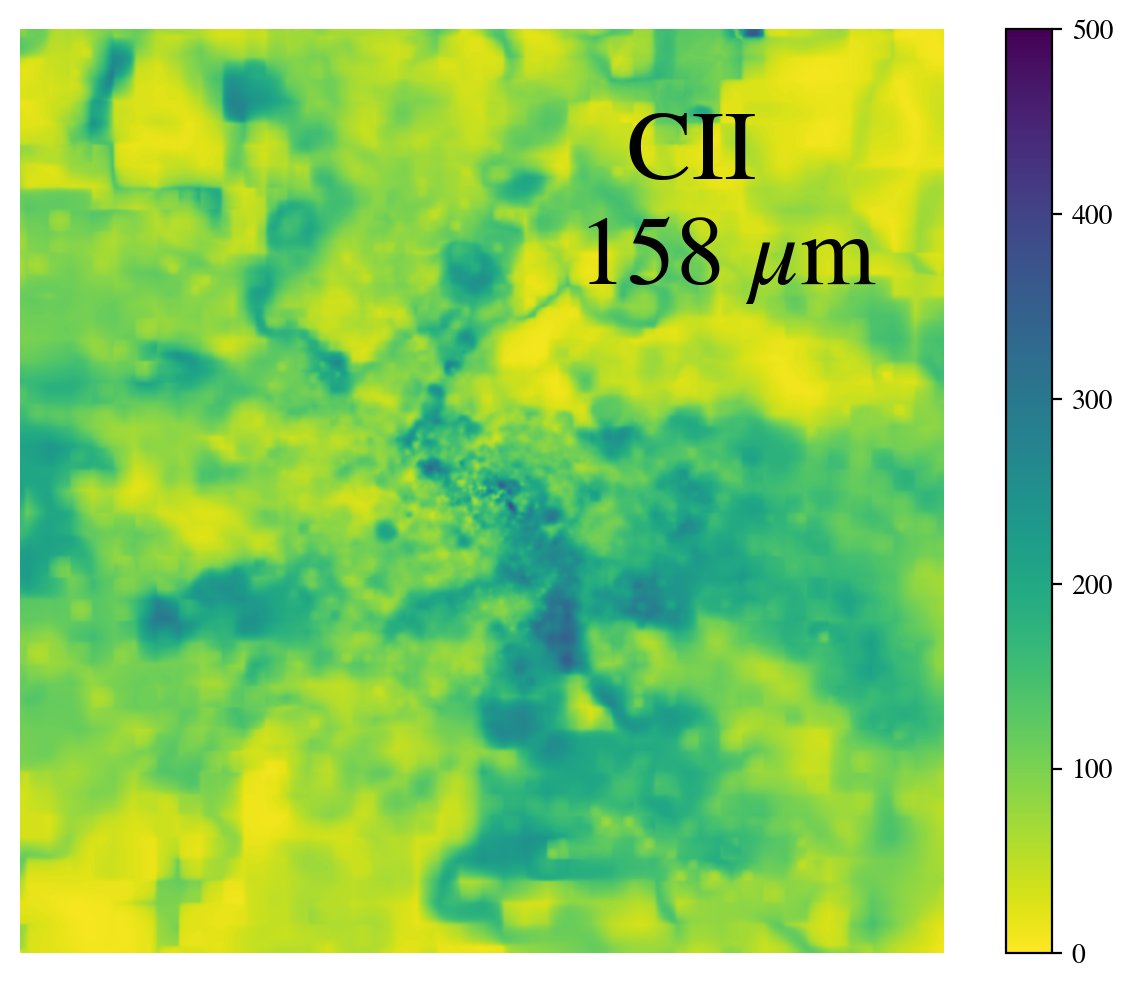

In [10]:
''' CREATING MOMENT 2 '''

isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

for i in range(len(velocity_arr)):
    for j in range(len(image_array)):
        for k in range(len(image_array)):
            isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment2[0,0] = 0

isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
isolate_moment_2[0,0] = 0

isolate_moment_2 = np.sqrt(isolate_moment_2)

       
params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

figx, figy = 8,6

plt.figure(figsize=(figx,figy), dpi=200, facecolor='w')
#integrated_image_array[0,0] = 0
cmap = matplotlib.cm.hot.copy()
low = cmap(0)
cmap.set_bad(color = low)

#plt.imshow(integrated_image_array.T/np.max(integrated_image_array.T), extent=(-10,10,-10,10), interpolation='bicubic', cmap='hot', vmax=0.2, origin='lower')
plt.imshow(isolate_moment_2.T, vmin = 0, vmax = 500, extent=(-2,2,-2,2), \
           interpolation='bicubic', cmap='viridis_r', origin='lower')
plt.xlabel('X (kpc)', fontsize = 14)
plt.ylabel('Y (kpc)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.colorbar(label=r'$I_{\nu}$ / max($I_{\nu}$)')

plt.text(0.1,0.9,r'     CII'
               '\n'
               r'   158 $\mu$m', fontsize = 35)
cb = plt.colorbar() 
#cb.remove()
#plt.title(r'Vel-Integrated NII line emission image of A4 at -50 Myr'
#          '\n [-1000,1000] '
#         r'kms$^{-1}$', fontsize=12)
#plt.title(r'Velocity-Integrated CII image of MW-like galaxy (Face-on)'
#          '\n [-500,500] '
#          r'kms$^{-1}$ ', fontsize=12, usetex = True)

plt.axis('off')
dx = 1
yrg = [ -dx, dx ]
bar_size = 1 #dx / 2.
xleft = -1 #-bar_size/2.
#xleft += 0.5*dx
#ybar = yrg[0] + 0.06*dx
ybar= -1.5
colbar = 'white'
'''
plt.plot( [xleft,xleft+bar_size], [ybar,ybar], '-', color=colbar, linewidth=2 )
#plt.plot([0,1],[-2,-2],'-',color=colbar,linewidth=2)
bartxt = r'%d kpc' % np.round(bar_size).astype(int)
plt.text( xleft+0.5*bar_size, ybar+0.01*dx, bartxt, {'color':colbar, 'fontsize':50},
        horizontalalignment='center', verticalalignment='bottom' )
plt.tight_layout()
plt.show()
'''

In [11]:
''' CHECK ARRAY SIZES AND 3D CONTENTS '''

print(np.shape(velocity_arr))
print(np.shape(image_array))
print(np.shape(isolate_moment_1))
print(np.shape(isolate_moment_1_3D))
print(isolate_moment_1_3D)

(401,)
(512, 512, 401)
(512, 512)
(512, 512, 401)
[[[   0.            0.            0.         ...    0.
      0.            0.        ]
  [-172.58079073 -172.58079073 -172.58079073 ... -172.58079073
   -172.58079073 -172.58079073]
  [-170.19378476 -170.19378476 -170.19378476 ... -170.19378476
   -170.19378476 -170.19378476]
  ...
  [-100.69626255 -100.69626255 -100.69626255 ... -100.69626255
   -100.69626255 -100.69626255]
  [-108.81731384 -108.81731384 -108.81731384 ... -108.81731384
   -108.81731384 -108.81731384]
  [-117.13629389 -117.13629389 -117.13629389 ... -117.13629389
   -117.13629389 -117.13629389]]

 [[-175.89897013 -175.89897013 -175.89897013 ... -175.89897013
   -175.89897013 -175.89897013]
  [-174.08727834 -174.08727834 -174.08727834 ... -174.08727834
   -174.08727834 -174.08727834]
  [-171.21290722 -171.21290722 -171.21290722 ... -171.21290722
   -171.21290722 -171.21290722]
  ...
  [ -93.27815933  -93.27815933  -93.27815933 ...  -93.27815933
    -93.27815933  -93.2781